In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
from fbprophet import Prophet

In [2]:
import warnings
import logging
warnings.filterwarnings('ignore')
tracer = logging.getLogger()
tracer.setLevel(logging.CRITICAL) # or desired level

In [3]:
df = pd.read_csv('gbpusd.csv', parse_dates=['Date'], dayfirst=True)
df.rename(columns={
    'GBP/USD Close':'y',
    'Date':'ds'}, inplace=True)
df.head()

,ds,y
0,1998-12-31,1.6604
1,1999-01-01,1.6604
2,1999-01-04,1.6560
3,1999-01-05,1.6547
4,1999-01-06,1.6544


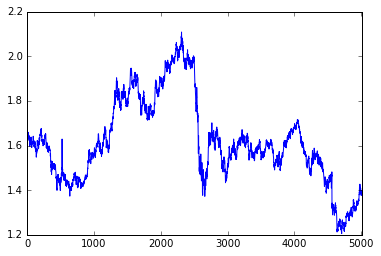

In [4]:
df['y'].plot()

In [5]:
end_period = len(df)
test_duration = 365
start_period = end_period - test_duration
print(start_period)

4647


In [6]:
def ret_predict_direction(dta):
    # Re-train every time period
    m = Prophet()
    m.fit(dta)
    future = m.make_future_dataframe(periods=6)
    forecast = m.predict(future)
    five_ahead = forecast['yhat'][-6:].values
    predicted_direction = five_ahead[-1]-five_ahead[0]
    return predicted_direction

In [7]:
def rule(position, predicted_direction):
    if (predicted_direction>0.004) and position=="none":
        return "buy"
    elif (predicted_direction<0.001) and position=="long":
        return "sell"
    elif position=="long":
        return "keep"
    else:
        return "none"

In [8]:
# Set variables
position = "none"
# Leverage is 200:1 and amount entry is 100 so effective is 20000
leverage = 20000  # two mini lots on FXCM is £20k and costs £100 to enter
profit_loss = 0
bought_at = 0
account = 0
all_advice = []

In [ ]:
# Run simulation
for period in range(start_period, end_period-6):
    # Assume we run this every morning on all data upto
    # and including yesterday
    # Then we assume market today opens at yesterday's close
    # So we buy/sell yesterday's close = today's open
    period_data = df[:period-1]
    # Generate prediction on what to do
    advice = rule(position, ret_predict_direction(period_data))
    print("Advice: ", advice)
    all_advice.append(advice)
    # Perform trade
    if advice == "buy":
        # Enter long position
        buy_at = period_data.tail(1)['y'].values[0]
        print("Buy at %.5f" % buy_at)
        position = "long"
        bought_at = buy_at
    elif advice == "sell":
        # Sell
        sell_at = period_data.tail(1)['y'].values[0]
        print("Sold at %.5f" % sell_at)
        profit_loss = leverage*(sell_at - buy_at)
        account += profit_loss
        position = "none"
        print("P/L from trade: ", profit_loss)
        print("Balance: ", account)

Advice:  none
Advice:  buy
Buy at 1.22240
Advice:  keep
Advice:  keep
Advice:  sell
Sold at 1.22359
P/L from trade:  23.800000000000487
Balance:  23.800000000000487
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  buy
Buy at 1.23652
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  keep
Advice:  sell
Sold at 1.26752
P/L from trade:  619.9999999999983
Balance:  643.7999999999988
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
Advice:  none
